In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# import seaborn as sns

# sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [4]:
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-10-18')
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.557465
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.624949
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.765111
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.898559
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.878097
...,...,...,...,...,...,...
2021-10-12,143.250000,141.039993,143.229996,141.509995,73035900.0,140.916916
2021-10-13,141.399994,139.199997,141.240005,140.910004,78762700.0,140.319443
2021-10-14,143.880005,141.509995,142.110001,143.759995,69907100.0,143.157486


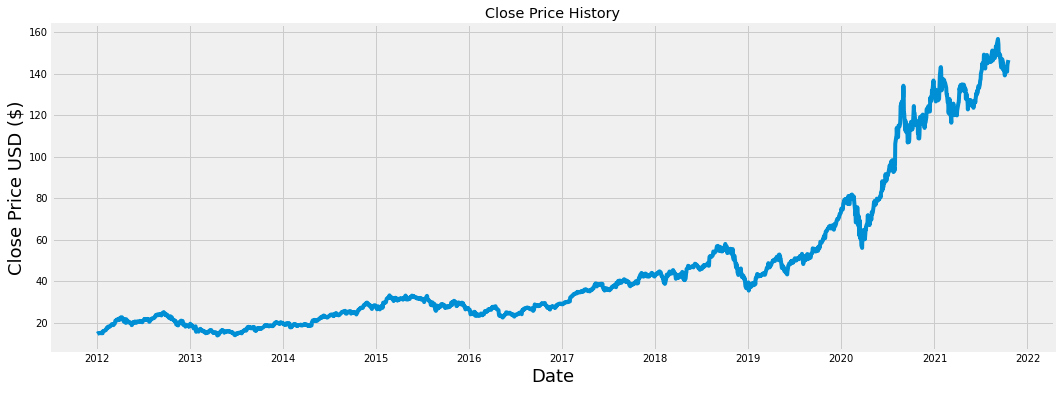

In [128]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [129]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = len(dataset)-60

training_data_len


2405

In [130]:
dataset

array([[ 14.6867857 ],
       [ 14.76571369],
       [ 14.92964268],
       ...,
       [143.75999451],
       [144.83999634],
       [146.55000305]])

In [131]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00517915],
       [0.00573209],
       [0.00688052],
       ...,
       [0.90941725],
       [0.91698334],
       [0.928963  ]])

In [132]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]


In [133]:
len(train_data)

2405

In [134]:
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):#60~2304
    x_train.append(train_data[i-60:i, 0])#拿60個數據（0~60,1~61) 資料做位移展開
    y_train.append(train_data[i, 0])#未來一天的數據
    if i<= 61:
        print(x_train)
        print(y_train)
        print()#空格
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))#(2304,60,1)
# x_train.shape

[array([0.00517915, 0.00573209, 0.00688052, 0.0079739 , 0.00780626,
       0.00818406, 0.00801143, 0.00772119, 0.00732587, 0.00854936,
       0.00965275, 0.00931247, 0.00744847, 0.0092274 , 0.007476  ,
       0.01404377, 0.01353586, 0.0141989 , 0.01563254, 0.01650074,
       0.01642818, 0.01616047, 0.01730138, 0.01837474, 0.01959072,
       0.0215548 , 0.02568061, 0.02574316, 0.02804001, 0.02975638,
       0.02680652, 0.02794242, 0.02791991, 0.03110496, 0.03065209,
       0.03149026, 0.03299647, 0.03383465, 0.03624909, 0.03800799,
       0.0385159 , 0.03869355, 0.03568614, 0.03496055, 0.03506814,
       0.03789542, 0.03869105, 0.04039993, 0.04442815, 0.04980247,
       0.04879666, 0.04879916, 0.05268478, 0.05390076, 0.05303505,
       0.05224443, 0.05142127, 0.05415595, 0.05603247, 0.0568181 ])]
[0.05487653421186173]

[array([0.00517915, 0.00573209, 0.00688052, 0.0079739 , 0.00780626,
       0.00818406, 0.00801143, 0.00772119, 0.00732587, 0.00854936,
       0.00965275, 0.00931247, 0.00

In [135]:
x_train.shape[1]

60

In [136]:
x_train.shape[0]

2345

In [137]:
x_train

array([[[0.00517915],
        [0.00573209],
        [0.00688052],
        ...,
        [0.05415595],
        [0.05603247],
        [0.0568181 ]],

       [[0.00573209],
        [0.00688052],
        [0.0079739 ],
        ...,
        [0.05603247],
        [0.0568181 ],
        [0.05487653]],

       [[0.00688052],
        [0.0079739 ],
        [0.00780626],
        ...,
        [0.0568181 ],
        [0.05487653],
        [0.05229697]],

       ...,

       [[0.84608648],
        [0.84377461],
        [0.83810007],
        ...,
        [0.92784207],
        [0.90023991],
        [0.92616069]],

       [[0.84377461],
        [0.83810007],
        [0.83739947],
        ...,
        [0.90023991],
        [0.92616069],
        [0.92090647]],

       [[0.83810007],
        [0.83739947],
        [0.82324819],
        ...,
        [0.92616069],
        [0.92090647],
        [0.9307144 ]]])

In [138]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

# Build the LSTM model
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2345/2345 [==============================] - 41s 16ms/step - loss: 0.0041


In [139]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]#最後那0.05
#len(dataset) = 2425
#training_data_len = 2304
#len(test_data) = 181
#len(valid) = 121
#len(x_test,y_test) = 121

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    #181個testdate分批(前60天數據)
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
mape = np.mean(np.abs((y_test - predictions)/y_test))*100
print(rmse)
print(mape)

4.271739411170295
2.4602535779958554


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


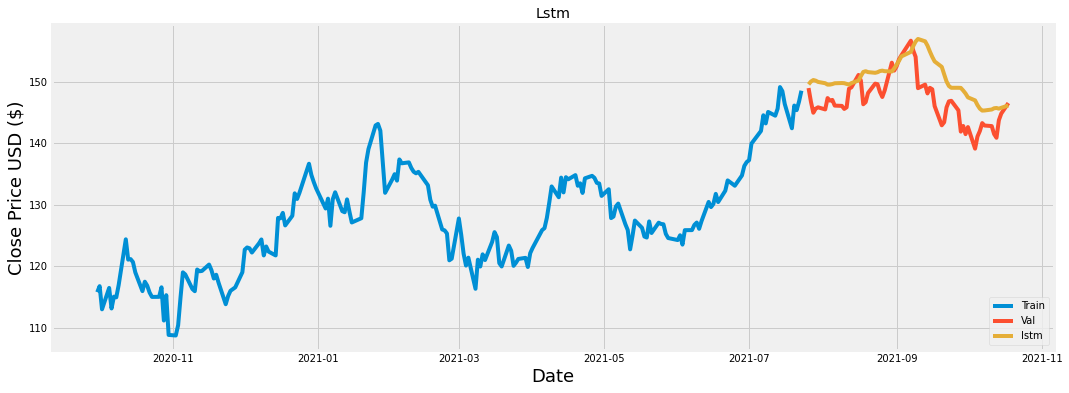

In [141]:
# Plot the data
train = data[2200:training_data_len]
valid = data[training_data_len:]#121個
valid['lstm'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Lstm')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'lstm']])
plt.legend(['Train', 'Val', 'lstm'], loc='lower right')
plt.show()
# plt.savefig('lstm.png')

In [142]:
# Import Keras libraries and packages
from keras.models import Sequential  #用來啟動 NN
from keras.layers import Conv1D  # Convolution Operation
from keras.layers import MaxPooling1D # Pooling
from keras.layers import Flatten
from keras.layers import Dense # Fully Connected Networks

# initializing CNN
cnn_lstm = Sequential()  
cnn_lstm.add(Conv1D(256,  3, input_shape = (x_train.shape[1], 1), activation = 'relu'))
cnn_lstm.add(MaxPooling1D(pool_size = (2)))
# Second convolutional layer
# model.add(Conv1D(64,  3, activation = 'relu'))
# model.add(MaxPooling1D(pool_size = (2)))

# # Third convolutional layer
# model.add(Conv1D(32,  3, activation = 'relu'))
# model.add(MaxPooling1D(pool_size=(2)))
# model.add(Flatten())
# model.add(LSTM(64, return_sequences=False))
# model.add(Dropout(0.2))
cnn_lstm.add(LSTM(128, return_sequences=False))
cnn_lstm.add(Dense(64))
cnn_lstm.add(Dropout(0.2))
# model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
cnn_lstm.add(Dense(1))

# Compile the model
cnn_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
cnn_lstm.fit(x_train, y_train, batch_size=1, epochs=1)

2345/2345 [==============================] - 17s 7ms/step - loss: 0.0029


In [143]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]#最後那0.05
#len(dataset) = 2425
#training_data_len = 2304
#len(test_data) = 181
#len(valid) = 121
#len(x_test,y_test) = 121

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    #181個testdate分批(前60天數據)
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
hybrid_pre = cnn_lstm.predict(x_test)
hybrid_pre = scaler.inverse_transform(hybrid_pre)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((hybrid_pre - y_test) ** 2)))
mape = np.mean(np.abs((y_test - hybrid_pre)/y_test))*100
print(rmse)
print(mape)

3.0937227593965497
1.7588676160898278


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


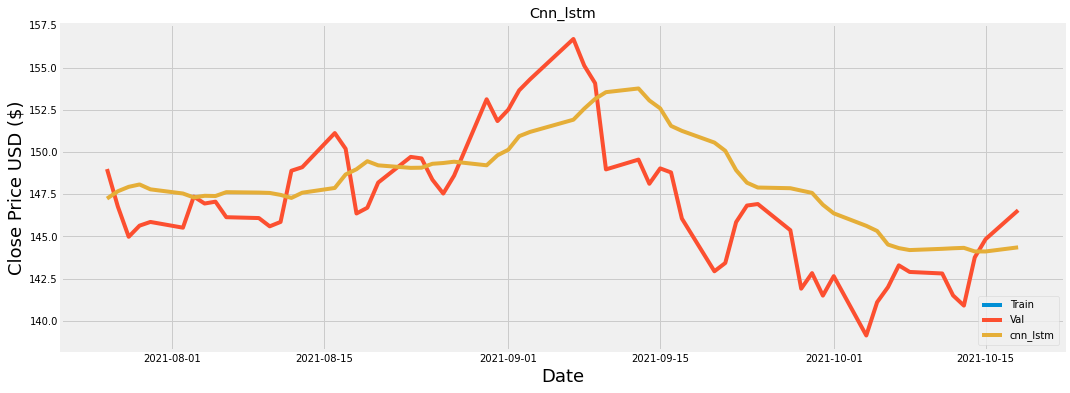

<Figure size 432x288 with 0 Axes>

In [146]:
# Plot the data
train = data[2410:training_data_len]
valid = data[training_data_len:]#121個
valid['cnn_lstm'] = hybrid_pre
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Cnn_lstm')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'cnn_lstm']])
plt.legend(['Train', 'Val', 'cnn_lstm'], loc='lower right')
plt.show()
plt.savefig('cnn_lstm.png')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


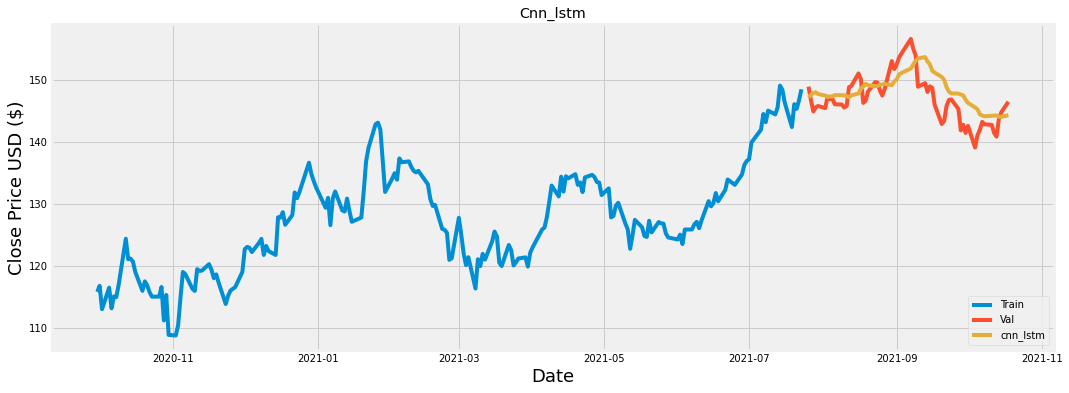

<Figure size 432x288 with 0 Axes>

In [148]:
# Plot the data
train = data[2200:training_data_len]
valid = data[training_data_len:]#121個
valid['cnn_lstm'] = hybrid_pre
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Cnn_lstm')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'cnn_lstm']])
plt.legend(['Train', 'Val', 'cnn_lstm'], loc='lower right')
plt.show()
plt.savefig('cnn_lstm.png')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


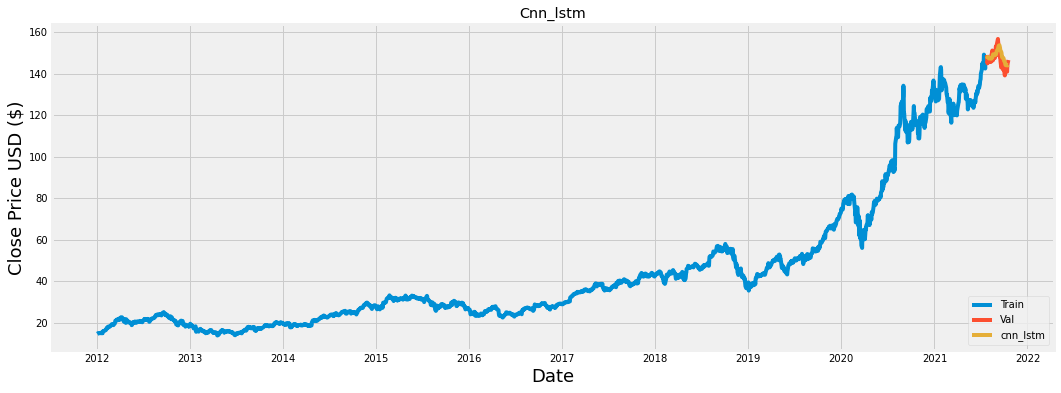

<Figure size 432x288 with 0 Axes>

In [18]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]#121個
valid['cnn_lstm'] = hybrid_pre
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Cnn_lstm')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'cnn_lstm']])
plt.legend(['Train', 'Val', 'cnn_lstm'], loc='lower right')
plt.show()
plt.savefig('cnn_lstm.png')#不要黃

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


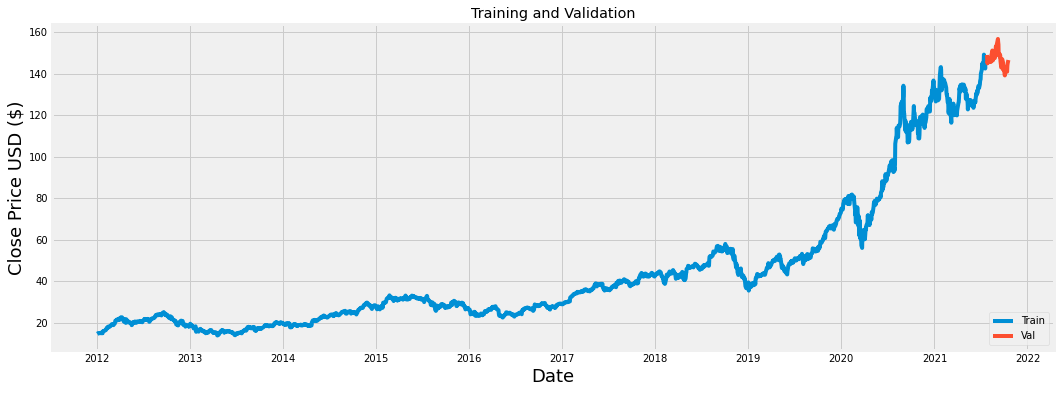

<Figure size 432x288 with 0 Axes>

In [53]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]#121個
valid['cnn_lstm'] = hybrid_pre
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Training and Validation')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
plt.savefig('cnn_lstm.png')#不要黃

In [20]:
valid

,Close,cnn_lstm
Date,,
2021-07-26,148.990005,147.173264
2021-07-27,146.770004,147.628189
2021-07-28,144.979996,147.881317
2021-07-29,145.639999,148.055344
2021-07-30,145.860001,147.781265
2021-08-02,145.520004,147.508636
2021-08-03,147.360001,147.268906
2021-08-04,146.949997,147.306091
2021-08-05,147.059998,147.319824


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


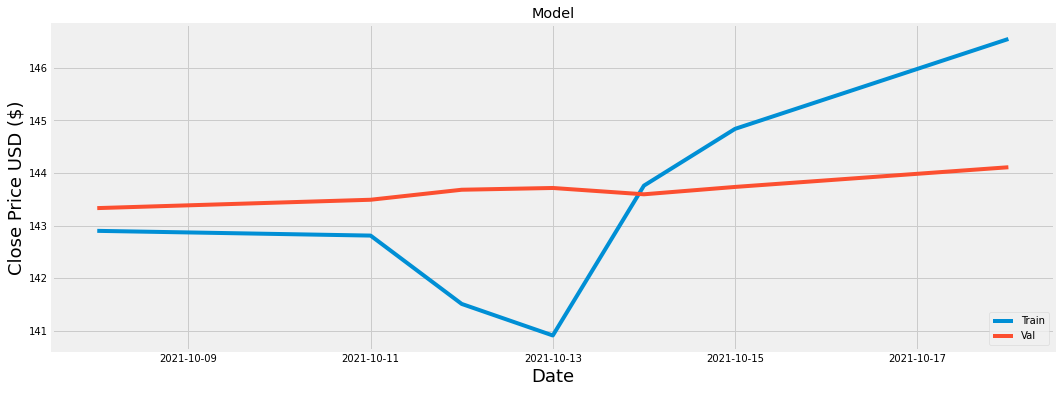

In [49]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]#121個
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
# plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [50]:
valid

,Close,Predictions
Date,,
2021-10-08,142.899994,143.332779
2021-10-11,142.809998,143.491577
2021-10-12,141.509995,143.682068
2021-10-13,140.910004,143.715500
2021-10-14,143.759995,143.595413
2021-10-15,144.839996,143.735382
2021-10-18,146.550003,144.110046


In [51]:
valid['sentiment'] = [-0.18576258250645228, -0.1661303821282509, -0.17606987751447237, -0.1454795504991825, -0.13182590313446826, -0.11148571922228886, 0.048055601119995114]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
valid

,Close,Predictions,sentiment
Date,,,
2021-10-08,142.899994,143.332779,-0.185763
2021-10-11,142.809998,143.491577,-0.166130
2021-10-12,141.509995,143.682068,-0.176070
2021-10-13,140.910004,143.715500,-0.145480
2021-10-14,143.759995,143.595413,-0.131826
2021-10-15,144.839996,143.735382,-0.111486
2021-10-18,146.550003,144.110046,0.048056


In [179]:
y=[143.332779,143.491577,143.682068,143.715500,143.595413,143.735382,144.110046]
x= [-0.18576258250645228, -0.1661303821282509, -0.17606987751447237, -0.1454795504991825, -0.13182590313446826, -0.11148571922228886, 0.048055601119995114]

In [180]:
from sklearn.linear_model import LinearRegression
# x = valid['sentiment']
# y = valid['Predictions']
x = np.array(x)
y = np.array(y)
x= x[:,np.newaxis]
y= y[:,np.newaxis]
print(x,y)
z = np.hstack((x,y)) # vertical stack
z

[[-0.18576258]
 [-0.16613038]
 [-0.17606988]
 [-0.14547955]
 [-0.1318259 ]
 [-0.11148572]
 [ 0.0480556 ]] [[143.332779]
 [143.491577]
 [143.682068]
 [143.7155  ]
 [143.595413]
 [143.735382]
 [144.110046]]


array([[-1.85762583e-01,  1.43332779e+02],
       [-1.66130382e-01,  1.43491577e+02],
       [-1.76069878e-01,  1.43682068e+02],
       [-1.45479550e-01,  1.43715500e+02],
       [-1.31825903e-01,  1.43595413e+02],
       [-1.11485719e-01,  1.43735382e+02],
       [ 4.80556011e-02,  1.44110046e+02]])

In [175]:
n = z[:-3]

In [152]:
z[-0]

array([ -0.18576258, 143.332779  ])

In [153]:
z

array([[-1.85762583e-01,  1.43332779e+02],
       [-1.66130382e-01,  1.43491577e+02],
       [-1.76069878e-01,  1.43682068e+02],
       [-1.45479550e-01,  1.43715500e+02],
       [-1.31825903e-01,  1.43595413e+02],
       [-1.11485719e-01,  1.43735382e+02]])

In [29]:
c = np.array(valid['Close'][-7:-1])
c = 

array([142.8999939 , 142.80999756, 141.50999451, 140.91000366,
       143.75999451, 144.83999634])

In [74]:
reg = LinearRegression().fit(z, c)
pre = reg.predict(z)
valid['hybrid_predict'] = pre
valid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Close,Predictions,sentiment,hybrid_predict
Date,,,,
2021-10-08,142.899994,143.332779,-0.185763,143.200026
2021-10-11,142.809998,143.491577,-0.166130,142.894929
2021-10-12,141.509995,143.682068,-0.176070,141.274522
2021-10-13,140.910004,143.715500,-0.145480,142.201287
2021-10-14,143.759995,143.595413,-0.131826,143.499522
2021-10-15,144.839996,143.735382,-0.111486,143.344314
2021-10-18,146.550003,144.110046,0.048056,146.865384


In [4]:
import numpy as np
prediction = [142.8999939 , 142.80999756, 142.80999451, 140.91000366,
       143.75999451,143.735382,144.110046	]
close = [142.8999939 , 142.80999756, 142.80999451, 140.91000366,
       143.75999451, 144.83999634,146.550003]
m = np.array(close[-2:])
o = np.array(prediction[-2:])
# n = z[-2:]

In [7]:
rmse = np.sqrt(np.mean(((o - m) ** 2)))
mape = np.mean(np.abs((m - o)/7))*100
print(rmse)
print(mape)

1.8938800123004924
25.318366714285744


In [244]:
n

array([[-1.85762583e-01,  1.43332779e+02],
       [-1.66130382e-01,  1.43491577e+02],
       [-1.76069878e-01,  1.43682068e+02],
       [-1.45479550e-01,  1.43715500e+02],
       [-1.31825903e-01,  1.43595413e+02],
       [-1.11485719e-01,  1.43735382e+02]])

In [245]:
m

[142.8999939,
 142.80999756,
 142.80999451,
 140.91000366,
 143.75999451,
 144.83999634]

In [252]:
z[-1:]

array([[4.80556011e-02, 1.44110046e+02]])

In [255]:
reg = LinearRegression().fit(n, m)
pre = reg.predict(z[-2:])


In [256]:
pre

array([143.93537278, 148.2778222 ])

In [13]:
rmse = np.sqrt(np.mean(((p[-2:] - m) ** 2)))
# mape = np.mean(np.abs((m - pre)/y_test))*100
print(rmse)
# print(mape)

1.3790763164516529


In [12]:
p=[142.8999939 , 142.80999756, 142.80999451, 140.91000366,
       143.75999451,143.93537278, 148.2778222]

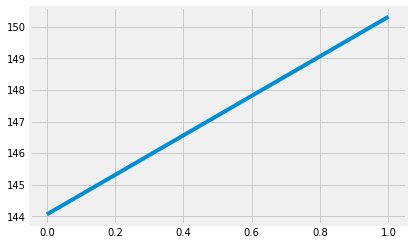

In [214]:
plt.plot(pre)

In [ ]:
pre = []

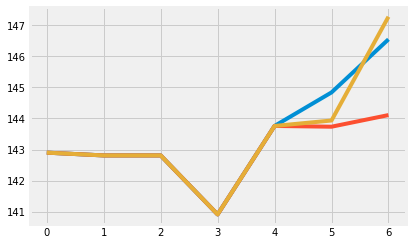

In [270]:
plt.plot(close)
plt.plot(prediction)
plt.plot(p)

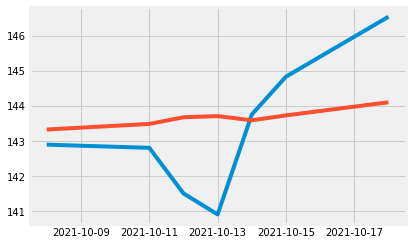

In [77]:
plt.plot(valid[['Close', 'Predictions']])

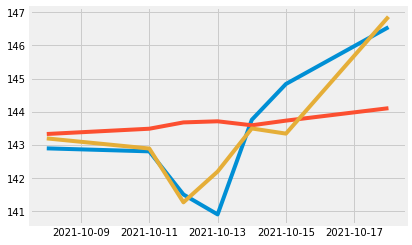

In [75]:
plt.plot(valid[['Close', 'Predictions','hybrid_predict']])
#rsqr 關聯性很高 有機會拿來做預測 六天比一天

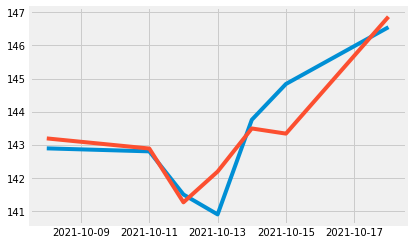

In [79]:
plt.plot(valid[['Close', 'hybrid_predict']])

In [82]:
real = np.array(valid['Close'])
use_lstm = np.array(valid['Predictions'])
use_lstm_sentiment = np.array(valid['hybrid_predict'])

In [87]:
lstm_rmse = np.sqrt(np.mean(((use_lstm - real) ** 2)))
lstm_mape = np.mean(np.abs(( real - use_lstm)/real))*100
print(lstm_rmse)
print(lstm_mape)

1.708851474343304
0.9782987301896304


In [88]:
lstm_sentiment_rmse = np.sqrt(np.mean(((use_lstm_sentiment - real) ** 2)))
lstm_sentiment_mape = np.mean(np.abs(( real - use_lstm_sentiment)/real))*100
print(lstm_sentiment_rmse)
print(lstm_sentiment_mape)

0.7768496999519895
0.397321890463669
